<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from scipy import interpolate, stats

# Regression and Least Squares

Earlier, we encountered interpolation as a means to determine a line given only a few points.  Interpolation determined a polynomial that would go through each point.  This is not always sensible however.

Let's consider the following example where the data represents cigarette consumption and death rates for countries given.

| Country | Cigarette Consumption | Deaths per Million | 
| ------ | ------ | ------ | 
| Norway | 250 | 95 |
| Sweden | 300 | 120 |
| Denmark | 350 | 165 |
| Australia | 470 | 170 |

If we use interpolation as we had earlier, we get the following picture.

Text(0,0.5,'Deaths per million')

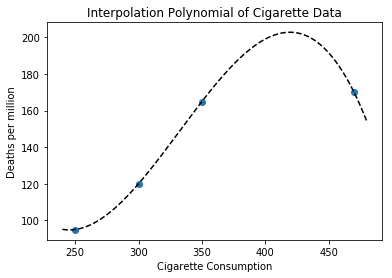

In [2]:
cigs = [250, 300, 350, 470]
death = [95, 120, 165, 170]

xs = np.linspace(240, 480, 1000)
i1 = interpolate.splrep(cigs, death, s=0)
ynews = interpolate.splev(xs, i1, der = 0)


plt.plot(cigs, death, 'o')
plt.plot(xs, ynews, '--k')
plt.title("Interpolation Polynomial of Cigarette Data")
plt.xlabel("Cigarette Consumption")
plt.ylabel("Deaths per million")

Now suppose that we wanted to use our polynomial to make a prediction about a country with higher cigarette consumption than that of Australia.  You should notice that our polynomial would provide an estimate that is lower.

Alternatively, we can fit a straight line to the data with a simple numpy function `polyfit` where we describe the data we are fitting and the degree polynomial we are fitting.  Here we want a straight line so we choose degree 1.

In [3]:
a, b = np.polyfit(cigs, death, 1)

In [4]:
def l(x):
    return a*x + b

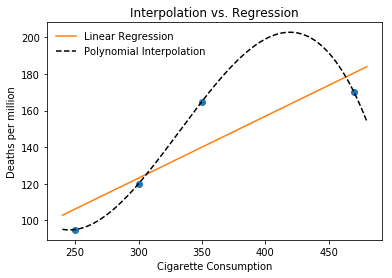

In [5]:
xs = np.linspace(240, 480, 1000)
i1 = interpolate.splrep(cigs, death, s=0)
ynews = interpolate.splev(xs, i1, der = 0)
plt.plot(cigs, death, 'o')
plt.plot(xs, l(xs), label = 'Linear Regression')
plt.plot(xs, ynews, '--k', label = 'Polynomial Interpolation')
plt.title("Interpolation vs. Regression")
plt.xlabel("Cigarette Consumption")
plt.ylabel("Deaths per million")
plt.legend(loc = 'best', frameon = False)

## Determining the Line of Best Fit

The idea behind our line of best fit, is that it minimizes the distance between itself and all the data points.  These distances are called residuals and are shown in the plot below.

Text(0.5,1,'Residuals')

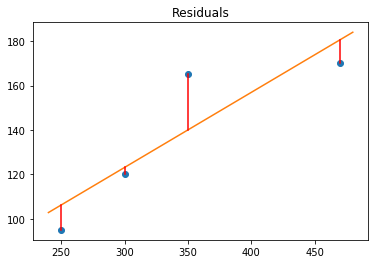

In [6]:
plt.plot(cigs, death, 'o')
plt.plot(xs, l(xs), label = 'Linear Regression')
plt.plot((cigs[0], cigs[0]), (death[0], l(cigs[0])), c = 'red')
plt.plot((cigs[1], cigs[1]), (death[1], l(cigs[1])), c = 'red')
plt.plot((cigs[2], cigs[2]), (death[2], l(cigs[2])), c = 'red')
plt.plot((cigs[3], cigs[3]), (death[3], l(cigs[3])), c = 'red')
plt.title("Residuals")

The line of best fit minimizes these distances using familiar techniques of differentiation that we have studied.  First, we investigate the criteria of least squares, that says the residuals are minimized by finding the smallest **ROOT MEAN SQUARE ERROR** or **RMSE**.  

In general, we see that a residual is the distance between some actual data point $(x_i, y_i)$ and the resulting point on the line of best fit $l(x)$ at the point $(x_i, l(x_i))$.

Suppose we were deciding between the lines

$$y_1 = .3x + 34.75 \quad y_2 = .4x + .5$$

We want to compare the average difference between the actual and predicted values.  We can find the residuals by creating a list of differences in terms of actual and predicted values.

In [7]:
def y1(x):
    return 0.3*x + 34.75

def y2(x):
    return 0.4*x + 0.5

Text(0.5,1,'Which is the Better Fit?')

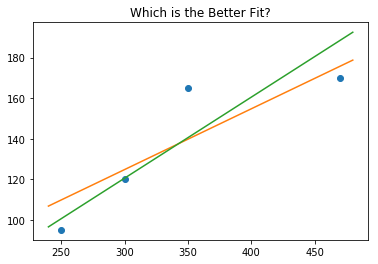

In [8]:
plt.plot(cigs, death, 'o')
plt.plot(xs, y1(xs))
plt.plot(xs, y2(xs))
plt.title("Which is the Better Fit?")

In [9]:
resid_1 = [np.sqrt((death[i] - y1(cigs[i]))**2) for i in range(len(cigs))]
resid_2 = [np.sqrt((death[i] - y2(cigs[i]))**2) for i in range(len(cigs))]

In [10]:
resid_1

[14.75, 4.75, 25.25, 5.75]

In [11]:
resid_2

[5.5, 0.5, 24.5, 18.5]

In [12]:
resid_1_sq = [(a**2 )/4for a in resid_1]
resid_2_sq = [(a**2)/4 for a in resid_2]

In [13]:
np.sqrt(sum(resid_1_sq))

15.089317413322579

In [14]:
np.sqrt(sum(resid_2_sq))

15.596473960482221

Thus, the first line $y1$ is considered a better fit for the data.

## Deriving the Equation of the Line

In general, we have some line of best fit $y$ given by:

$$y = a + bx$$

If we have some set of points $(x_1, y_1), (x_2, y_2), (x_3, y_3)...(x_n, y_n)$.  We need to minimize the sum of squares of residuals here, so we would have a number of values determined by:

$$[y_1 - (a + bx_1)]^2 + [y_2 - (a + bx_2)]^2 + [y_3 - (a + bx_3)]^2 + ... $$

which we can rewrite in summation notation as 

$$\sum_{i=1}^n[y_i - (a + bx_i)]^2$$

We can consider this as a function in terms of the variable $a$ that we are seeking to minimize.

$$g(a) = \sum_{i=1}^n[y_i - (a + bx_i)]^2$$

From here, we can apply our familiar strategy of differentiating the function and locating the critical values.  We are looking for the derivative of a sum, which turns out to be equivalent to the sum of the derivatives, hence we have

$$g'(a) = \sum_{i=1}^n \frac{d}{da}[y_i - (a + bx_i)]^2$$

$$g'(a) = \sum_{i=1}^n 2[y_i -a - bx_i](-1)$$

$$g'(a) = -2 [\sum_{i = 1}^n y_i - a - b\sum_{i=1}^n x_i]$$

Setting this equal to zero and solving for $a$ we get

$$a = \frac{1}{n} \sum_{i=1}^n y_i - b\frac{1}{n} \sum_{i=1}^n x_i$$

The terms should be familiar as averages, and we can rewrite our equation as

$$a = \bar{y} - b \bar{x}$$

We now use this to investigate a similar function in terms of $b$ to complete our solution.

$$f(b) = \sum_{i=1}^n[y_i - (\bar{y} + b(x_i - \bar{x}))]^2$$

We end up with 

$$b = \sum_{i = 1}^n \frac{(x_i - \bar{x})(y_i - \bar{y})}{(\bar{x} - x_i)^2}$$

Let's return to the problem of cigarette consumption and test our work out by manually computing $a$ and $b$.

Text(0.5,1,'Cigarette Consumption vs. Deaths')

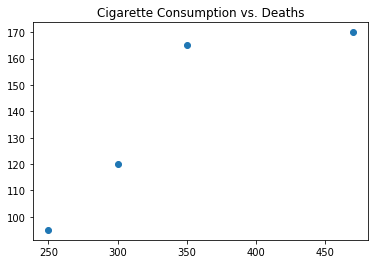

In [15]:
cigs = [250, 300, 350, 470]
death = [95, 120, 165, 170]

plt.scatter(cigs, death)
plt.title("Cigarette Consumption vs. Deaths")

In [16]:
ybar = np.mean(death)
xbar = np.mean(cigs)
ydiff = (death - ybar)
xdiff = (cigs - xbar)

b = np.sum(ydiff*xdiff)/np.sum(xdiff**2)
a = ybar - b*xbar
a, b

(21.621368322399249, 0.33833177132146203)

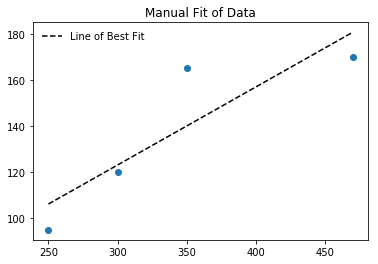

In [17]:
l = [a + b*i for i in cigs]
plt.scatter(cigs, death)
plt.plot(cigs, l, '--k', label = 'Line of Best Fit')
plt.title("Manual Fit of Data")
plt.legend(loc = 'best', frameon = False)

We can check with numpy and see if our values for $a$ and $b$ agree with the computer model.

In [18]:
b2, a2 = np.polyfit(cigs, death, 1)
a2, b2

(21.621368322399235, 0.33833177132146208)

Finally, we can write a simple function to compute the RMSE.

In [19]:
l

[106.20431115276476, 123.12089971883786, 140.03748828491098, 180.6373008434864]

In [20]:
death

[95, 120, 165, 170]

In [21]:
diff = [(l[i] - death[i])**2 for i in range(len(l))]
diff

[125.53658840796878,
 9.7400150550422442,
 623.12699112595669,
 113.15216923483649]

In [22]:
np.sqrt(np.sum(diff)/len(l))

14.761061647318972

## Other Situations

Our goal with regression is to identify situations where regression makes sense, fit models and discuss the reasonableness of the model for describing the data.  Data does not always come in linear forms however.  

We can easily generate sample data for familiar curves.  First, we can make some lists of polynomial form, then we will add some noise to these, fit models with `np.polyfit()`, and plot the results.  




### Non-Linear Functions

Plotting and fitting non-linear functions follows a similar pattern, however we need to take into consideration the nature of the function.  First, if we see something following a polynomial pattern, we can just use whatever degree polynomial fit we believe is relevant.  The derivation of these formulas follows the same structure as the linear case, except you are replacing the line $a - bx_i$ with a polynomial $a + bx_i + cx_i^2...$.

If we believe there to be an exponential fit, we can transform this into a linear situation using the logarithm.  For example, suppose we have the following population data.

| Decade $t$ | Year | Population |
| ----- | ------ | ----- |
| 0 | 1780 | 2.8 | 
| 1 | 1790 | 3.9 | 
| 2 | 1800 | 5.3 | 
| 3 | 1810 | 7.2 |

If we examine the data, we see an exponential like trend.  If we use NumPy to find the logarithm of the population values and plot the result, we note the transformed datas similarity to a linear function.

In [23]:
t = np.arange(0,13)
year = np.arange(1780,1910,10)
P = [2.8, 3.9, 5.3, 7.2, 9.6, 12.9, 17.1, 23.2, 31.4, 39.8, 50.2, 62.9, 76.0]

Text(0.5,1,'Transformed Data')

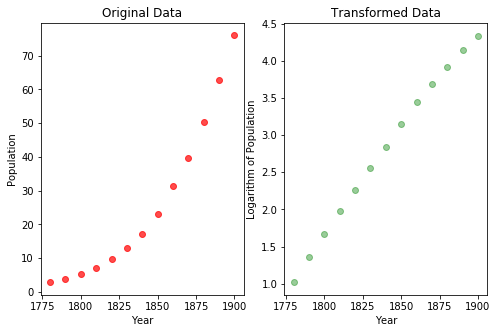

In [24]:
plt.figure(figsize = (8,5))
plt.subplot(1, 2, 1)
plt.scatter(year, P,color = 'red', alpha = 0.7)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title("Original Data")

plt.subplot(1, 2, 2)
lnP = np.log(P)
plt.scatter(year, lnP, color = 'green', alpha = 0.4)
plt.xlabel('Year')
plt.ylabel('Logarithm of Population')
plt.title("Transformed Data")

Symbolically, we would imagine the original function as an exponential of the form

$$y = ae^{bx}$$

The expression can be explored in a similar manner, where we use Sympy to find the effect of the logarithm.

In [25]:
y, a, b, x = sy.symbols('y a b x')

In [26]:
eq = sy.Eq(y, a*sy.exp(b*x))

In [27]:
sy.expand_log(sy.log(b**x))

log(b**x)

In [28]:
sy.expand_log(sy.log(a*sy.exp(b*x)), force = True)

b*x + log(a)

Hence, we have that

$$\log(y) = bx + \log(a)$$

which should look like our familiar linear equations.  Here, we can find $a$ and $b$, then convert the equation back to its original form by undoing the logarithm with the exponential.

For kicks, we introduce the SciPy `linregress` function.  Feel free to examine the help documentation for the function.  This gives a little more information about the model than the `polyfit` function.  Further, we add text to the plot to display information about the model.

In [29]:
line = np.polyfit(year, lnP, 1)
fit = np.polyval(line, year)
alpha, beta, r_value, p_value, std_err = stats.linregress(year, lnP) #
alpha, beta, r_value

(0.027906119028040695, -48.550830218916865, 0.998156911498427)

/Users/NYCMath/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Population')

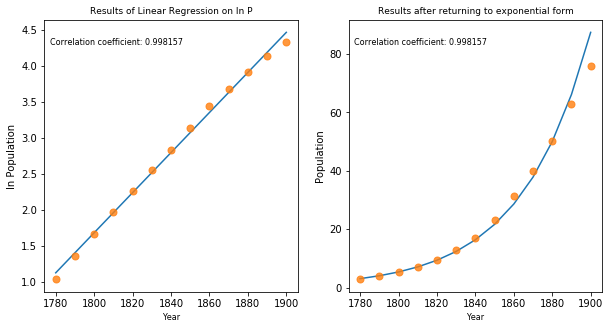

In [30]:
fig = plt.figure(figsize = (10,5))

plt.subplot(1, 2, 2)
plt.plot(year, np.exp(fit))
plt.plot(year, P, 'o', markersize = 7, alpha = 0.8)
ax = fig.add_subplot(121)
text_string = "\nCorrelation coefficient: %f" % (r_value)
ax.text(0.022, 0.972, text_string, transform=ax.transAxes, verticalalignment='top',  fontsize=8)
plt.title("Results of Linear Regression on ln P", fontsize = 9)
plt.xlabel("Year", fontsize = 8)
plt.ylabel("ln Population")

plt.subplot(1, 2, 1)
plt.plot(year, fit)
plt.plot(year, lnP, 'o', markersize = 7, alpha = 0.8)
ax = fig.add_subplot(122)
text_string = "\nCorrelation coefficient: %f" % (r_value)
ax.text(0.022, 0.972, text_string, transform=ax.transAxes, verticalalignment='top',  fontsize=8)
plt.title("Results after returning to exponential form", fontsize = 9)
plt.xlabel("Year", fontsize = 8)
plt.ylabel("Population")

## Logistic Example

As you see above, towards the end of our model the actual and predicted values seem to diverge.  Considering the context, this makes sense.  A population should reach some maximum levels due to physical resources.  A more S shaped curve is the logistic function which is given by 

$$y = \frac{L}{1 + e^{a+bx}}$$

As an example, consider the Inter Continental Ballistic Missle Data for 1960 - 1969.

| Year | Number of ICBM's |
| --- | --- |
| 1960 | 18 |
| 1961 | 63 |
| 1962 | 294 |
| 1963 | 424 |
| 1964 | 834 |
| 1965 | 854 |
| 1966 | 904 |
| 1967 | 1054 |
| 1968 | 1054 |
| 1969 | 1054 |

In [31]:
year = [i for i in np.arange(1960, 1970, 1)]
icbm = [18, 63, 294, 424, 834, 854, 904, 1054, 1054, 1054]

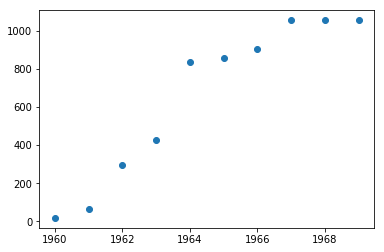

In [32]:
plt.scatter(year, icbm)

In [33]:
L, y, a, b, x = sy.symbols('L y a b x')

In [34]:
exp = sy.Eq(y, L/(1 + sy.exp(a + b*x)))

In [35]:
sy.solve(exp, (a + b*x),  force = True)

[log((L - y)/y)]

This means that the tranformation that linearizes our data is 

$$\log(\frac{L - y}{y})$$

The value $L$ is defined as the *carrying capacity* of the model.  Here, it seems something like $L = 1060$ would be a reasonable value to try.  

In [36]:
t_icbm = [np.log((1060 - i)/i) for i in icbm]

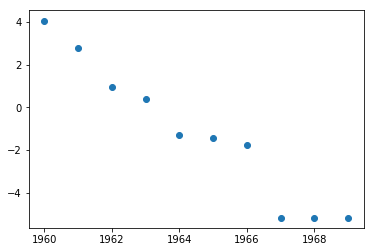

In [37]:
plt.scatter(year, t_icbm)

In [38]:
b, a = np.polyfit(year, t_icbm, 1)

In [39]:
a, b

(2091.7866057849333, -1.0653944179379831)

In [40]:
def l(x):
    return b*x + a

l(1960), l(1969)

(3.613546626486368, -5.9750031349553865)

In [41]:
fit = [l(i) for i in year]

Text(0,0.5,'Transformed ICMB Data')

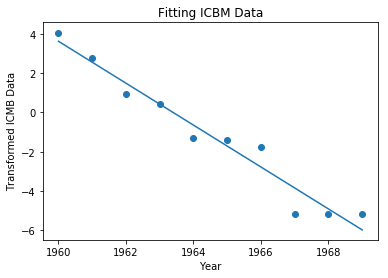

In [42]:
plt.scatter(year, t_icbm)
plt.plot(year, fit)
plt.title("Fitting ICBM Data")
plt.xlabel("Year")
plt.ylabel("Transformed ICMB Data")

Much like the last example, we can return everything to its original form with the exponential.  We arrive at the equation

$$y = \frac{1060}{1 + e^{2092 - 1.0654x}}$$

In [43]:
def y(x):
    return 1060/(1 + np.exp(2092 - 1.0654*x))

o_fit = [y(i) for i in year]

Text(0,0.5,"ICMB's")

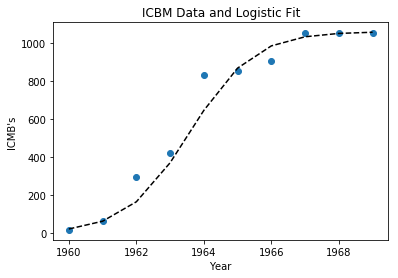

In [44]:
plt.scatter(year, icbm)
plt.plot(year, o_fit, '--k')
plt.title("ICBM Data and Logistic Fit")
plt.xlabel("Year")
plt.ylabel("ICMB's")

### Machine Learning Example



In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [46]:
diabetes_X[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [47]:
datasets?

In [48]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

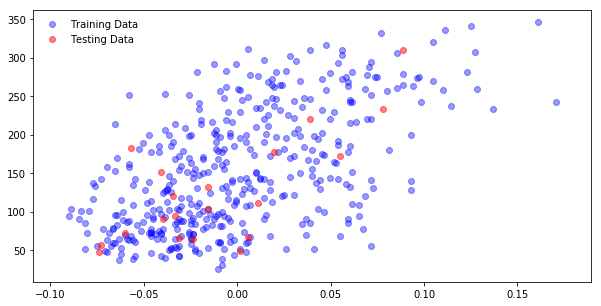

In [49]:
plt.figure(figsize = (10,5))
plt.scatter(diabetes_X_train, diabetes_y_train, color = 'blue', alpha = 0.4, label = "Training Data")
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'red', alpha = 0.5, label = "Testing Data")
plt.legend(frameon = False)

In [50]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [51]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


Text(0.5,1,'The fit against the Testing Data')

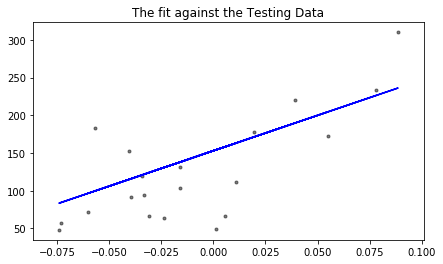

In [52]:
# Plot outputs
plt.figure(figsize = (7,4))
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black', alpha = 0.5, s = 9)
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue')
plt.title("The fit against the Testing Data")

### Problems

In [53]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
column_names = iris.feature_names

In [54]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [55]:
data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [56]:
df = pd.DataFrame(data)

NameError: name 'pd' is not defined

In [ ]:
df.columns = column_names

In [ ]:
df.head()

In [ ]:
df.iloc[:, [1]].head()

In [ ]:
plt.figure()
plt.scatter(df.iloc[:,1], df.iloc[:,2])
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.title("Relationship between Sepal Length and Width \nFrom the sklearn Iris Data", loc = 'right', fontsize = 12)


In [ ]:
df.describe()

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
bdata = boston.data
bcolumn_names = boston.feature_names

In [ ]:
print(boston.DESCR)

In [ ]:
df2 = pd.DataFrame(bdata)

In [ ]:
df2.columns = bcolumn_names

In [ ]:
df2.head()